# Heart Disease Classification 

## Import the Library

In [2]:
import pandas as pd
# For loading data as Pandas Dataframe
import numpy as np
# For performing Matrix Calculations
import seaborn as sns
# For visualizing statistical results
import scipy.stats as s
# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# For evaluating the performance of the model

# Logistic Regression Library
from celluloid import Camera
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from logistic_regression import LogisticRegression

# KNN Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met

## Load the Data

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis (EDA)

In [4]:
data_columns = data.columns

In [5]:
data_columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#ubah categorical data menjadi variabel2 
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['ca'] = data['ca'].astype('object')
data['thal'] = data['thal'].astype('object')
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [8]:
data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Change the label data name 
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.slope.replace({0: "upsloping", 
                          1: "flat", 
                          2:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [11]:
# Further description of our dataset
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Data Visualization

Disease vs No Disease

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

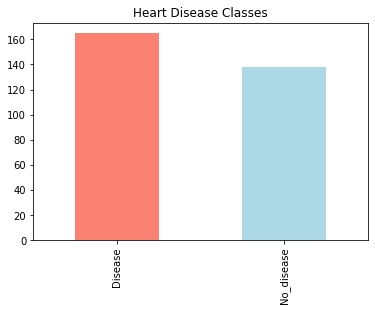

In [12]:
# Cek jumlah pembagian kelas ==> balanced/unbalanced
print(data.target.value_counts())
data['target'].value_counts().plot(kind='bar', color = ["salmon", "lightblue"]).set_title('Heart Disease Classes')

Age and Max Heart Rate

In [13]:
# Cek umur (min and max) => paling muda dan plg tua
print(min(data.age))
print(max(data.age))
print(data.age.mean())

29
77
54.366336633663366


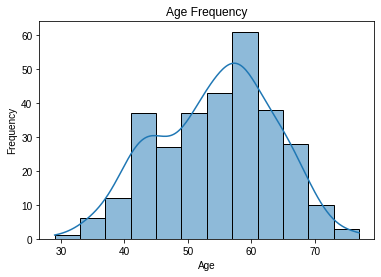

In [14]:
# Check the distribution of the age column with a histogram
sns.histplot(data["age"], kde=True)
plt.style.use("seaborn-darkgrid")

# Customize the plot
plt.title("Age Frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

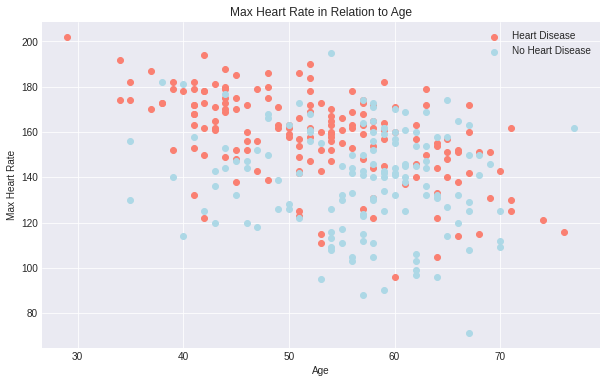

In [15]:
# Create another figure
fig,ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
pos_examples = ax.scatter(data.age[data.target=="Disease"], 
                          data.thalach[data.target == "Disease"], 
                          color="salmon", label="Heart Disease")

# Scatter with negative examples
neg_examples = ax.scatter(data.age[data.target=="No_disease"], 
                          data.thalach[data.target == "No_disease"], 
                          color="lightblue", label="No Heart Disease")

# Get mean line
mean = data["thalach"].mean()
mean_line = ax.plot()

# Customize the plot
plt.title("Max Heart Rate in Relation to Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

Gender

Male      207
Female     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

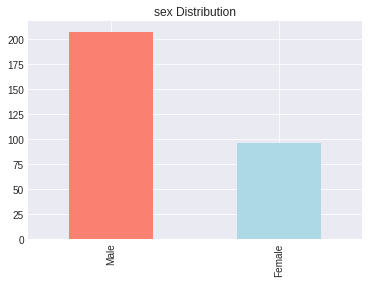

In [16]:
#cek data subyek berdasarkan gender
print(data.sex.value_counts())
data['sex'].value_counts().plot(kind='bar', color = ["salmon", "lightblue"]).set_title('sex Distribution')

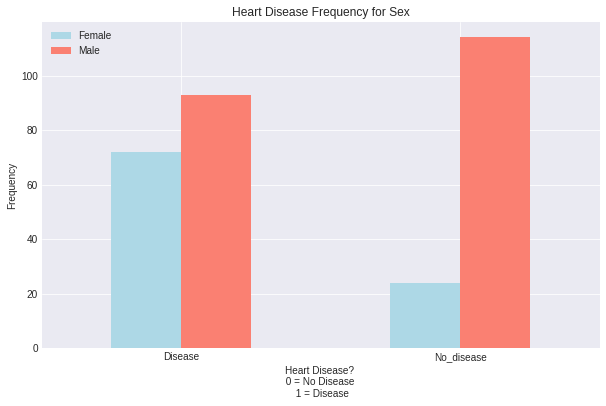

In [17]:
# Create a plot of crosstab
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

Chest Pain Type

typical_angina      143
non-anginal pain     87
atypical_angina      50
asymtomatic          23
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

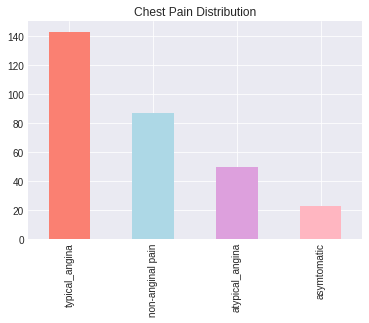

In [18]:
# Cek distribusi yg menderita chest pain
print(data.cp.value_counts())
data['cp'].value_counts().plot(kind='bar', color = ["salmon", "lightblue", "plum", "lightpink"]).set_title('Chest Pain Distribution')

### Features Correlations

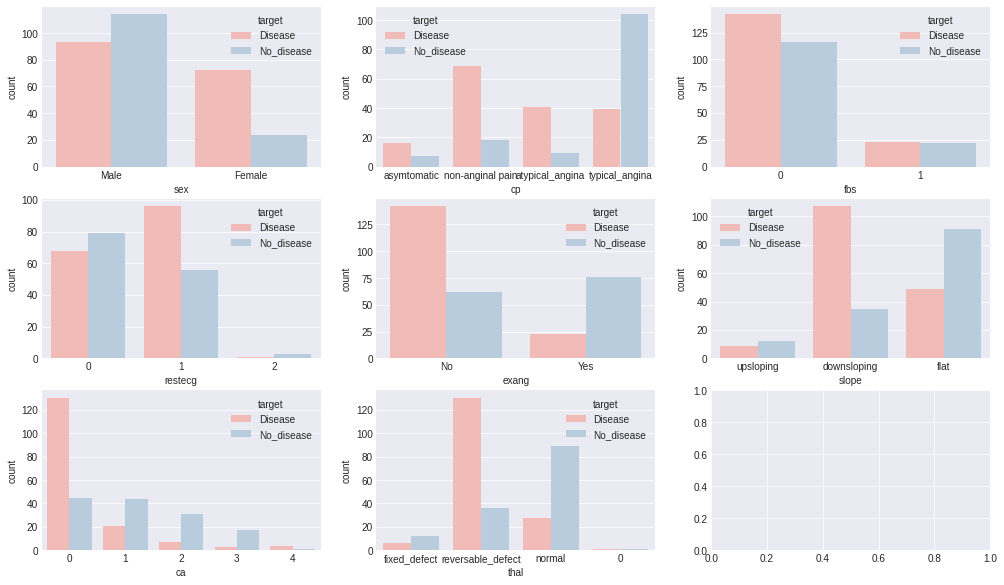

In [19]:
#visualisasi 8 fitur
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=data, ax=ax, palette='Pastel1')

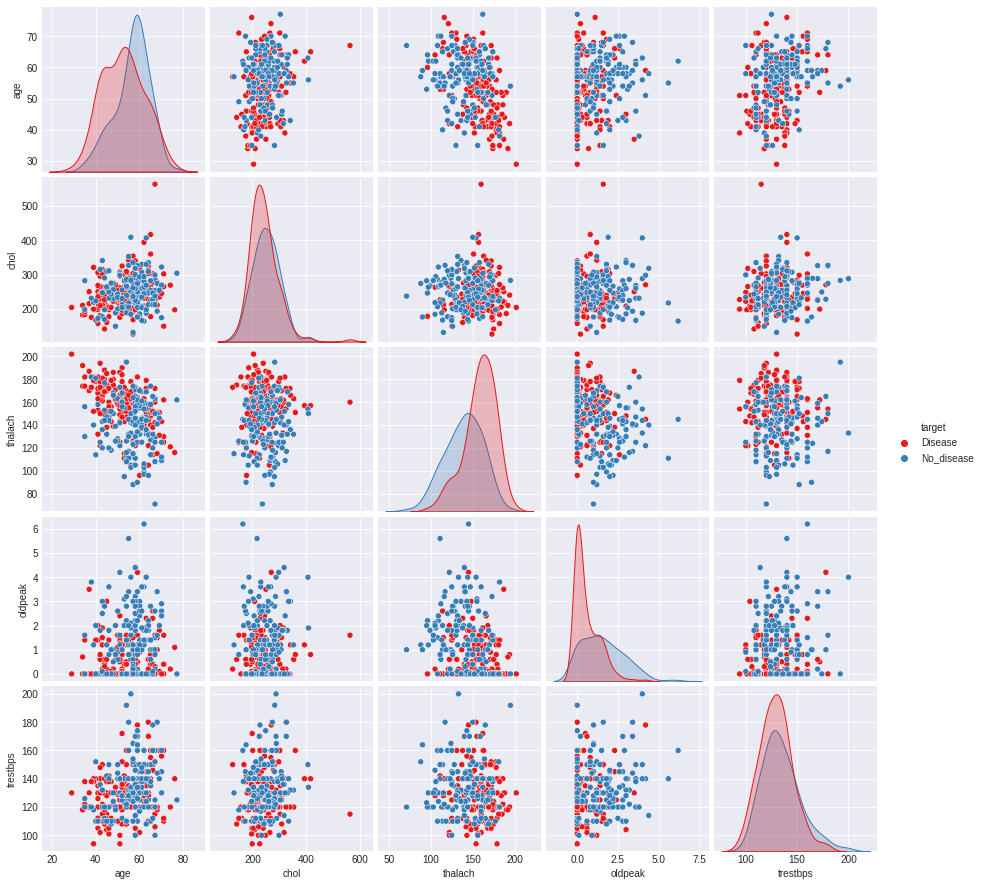

In [20]:
# visualisasi untuk melihat distribusi kelas dan cdf, continue variable
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(data[continous_features + ['target']], hue='target', palette='Set1')

In [21]:
# Make a correlation matrix
data.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


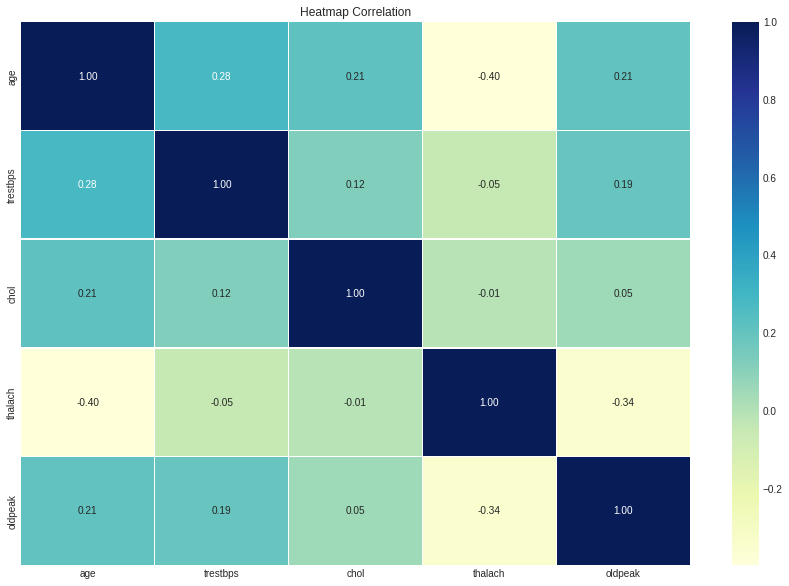

In [22]:
# Let's make our correlation matrix a bit prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

## Pre-Processing Data

In [23]:
data['target'] = data.target.replace({"Disease" : 1, "No_disease" : 0})
data['sex'] = data.sex.replace({"Male" : 1, "Female" : 0})
data['cp'] = data.cp.replace({"typical_angina" : 0, 
                          "atypical_angina" : 1, 
                          "non-anginal pain" : 2,
                          "asymtomatic" : 3})
data['exang'] = data.exang.replace({"Yes" : 1, "No" : 0})
data['slope'] = data.slope.replace({"upsloping" : 0, 
                          "flat" : 1, 
                          "downsloping" : 2})
data['thal'] = data.thal.replace({"fixed_defect" : 1, "reversable_defect" : 2, "normal" : 3})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [25]:
data['fbs'] = data['fbs'].astype('int64')
data['restecg'] = data['restecg'].astype('int64')
data['ca'] = data['ca'].astype('int64')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
# Patient with Disease and No disease in the Data
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [29]:
class0_data = data[data['target'] == 0]
class1_data = data[data['target'] == 1]

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]

training_data = pd.concat([class0_training_data,class1_training_data]) #sum of training data from class 0 and 1
cv_data = pd.concat([class0_cv_data,class1_cv_data])

In [30]:
training_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1


In [31]:
cv_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [32]:
corr_df = data.corr()

In [33]:
corr_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


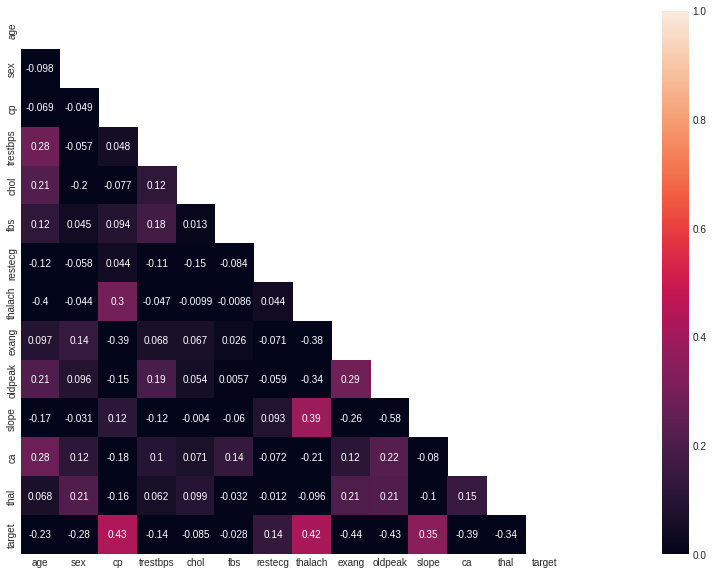

In [34]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True #True = generate a mask of lower triangle of matrix
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,10))
    sns.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [35]:
strong_relation_features = pd.Series(corr_df['target']).nlargest(n=5).iloc[1:] #take 4 features

In [36]:
strong_relation_features

cp         0.433798
thalach    0.421741
slope      0.345877
restecg    0.137230
Name: target, dtype: float64

In [37]:
target = data['target']
data_copy = data[list(strong_relation_features.to_dict().keys())]

In [38]:
data_copy['target'] = target

<ipython-input-38-f0527ccbf0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['target'] = target


In [39]:
data_copy

,cp,thalach,slope,restecg,target
0,3,150,0,0,1
1,2,187,0,1,1
2,1,172,2,0,1
3,1,178,2,1,1
4,0,163,2,1,1
...,...,...,...,...,...
298,0,123,1,1,0
299,3,132,1,1,0
300,0,141,1,1,0
301,0,115,1,1,0


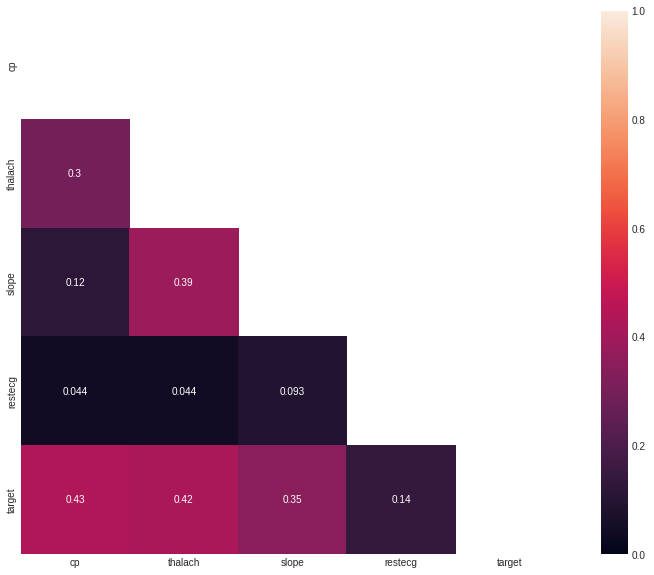

In [40]:
#Check heatmap again
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,10))
    sns.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

# Naive Bayes 

In [41]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())

In [42]:
data_copy_cov

array([[1.06513234e+00, 6.99161804e+00, 7.61370839e-02, 2.41077088e-02],
       [6.99161804e+00, 5.24646406e+02, 5.45936878e+00, 5.31462418e-01],
       [7.61370839e-02, 5.45936878e+00, 3.79734662e-01, 3.01510283e-02],
       [2.41077088e-02, 5.31462418e-01, 3.01510283e-02, 2.76528315e-01]])

In [43]:
data_copy_cov.shape

(4, 4)

In [44]:
#Calculate determinant from the matrix (ngecek matrix singular atau bukan)
data_copy_cov_det = np.linalg.det(data_copy_cov)

In [45]:
data_copy_cov_det

45.08916988315018

In [46]:
data_copy

,cp,thalach,slope,restecg,target
0,3,150,0,0,1
1,2,187,0,1,1
2,1,172,2,0,1
3,1,178,2,1,1
4,0,163,2,1,1
...,...,...,...,...,...
298,0,123,1,1,0
299,3,132,1,1,0
300,0,141,1,1,0
301,0,115,1,1,0


In [47]:
class0_data = data_copy[data_copy['target'] == 0]
class1_data = data_copy[data_copy['target'] == 1]

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]

training_data = pd.concat([class0_training_data,class1_training_data]) #sum of training data from class 0 and 1
cv_data = pd.concat([class0_cv_data,class1_cv_data])

In [48]:
training_data

,cp,thalach,slope,restecg,target
165,0,108,1,0,0
166,0,129,1,0,0
167,0,160,0,0,0
168,0,147,1,0,0
169,0,155,0,0,0
...,...,...,...,...,...
118,1,172,2,1,1
119,0,152,1,0,1
120,0,122,1,1,1
121,0,182,2,0,1


In [49]:
cv_data

,cp,thalach,slope,restecg,target
268,0,116,1,0,0
269,0,103,0,0,0
270,0,144,2,0,0
271,3,145,1,1,0
272,0,71,1,1,0
...,...,...,...,...,...
160,1,169,0,1,1
161,1,166,2,1,1
162,1,182,2,1,1
163,2,173,2,1,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


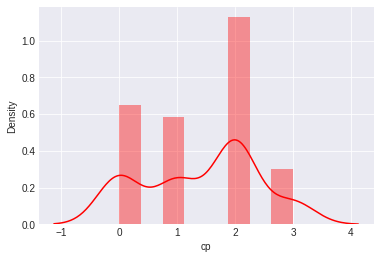

In [50]:
sns.distplot(a=training_data[training_data['target'] == 1]['cp'],color='r')

In [51]:
mu_1 = np.mean(training_data[training_data['target'] == 1]['cp'])
sigma_1 = np.std(training_data[training_data['target'] == 1]['cp'])
print(mu_1)
print(sigma_1)

1.4065040650406504
0.9781133189041143


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


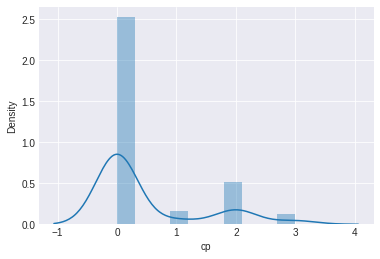

In [52]:
sns.distplot(a=training_data[training_data['target'] == 0]['cp'])

In [53]:
mu_0 = np.mean(training_data[training_data['target'] == 0]['cp'])
sigma_0 = np.std(training_data[training_data['target'] == 0]['cp'])
print(mu_0)
print(sigma_0)

0.47572815533980584
0.8905617316868835


In [54]:
#Class = 1

mu_1 = np.array(training_data[training_data['target'] == 1].iloc[:,0:4].mean())
sigma_1 = np.array(training_data[training_data['target'] == 1].iloc[:,0:4].cov())

In [55]:
#Class = 0

mu_0 = np.array(training_data[training_data['target'] == 0].iloc[:,0:4].mean())
sigma_0 = np.array(training_data[training_data['target'] == 0].iloc[:,0:4].cov())

In [56]:
def predict_classes(data):
    
    p_xi_on_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1) #likelihood for all tumors in the cross validation data conditioned on malignant tumors
    
    p_xi_on_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    
    p_class1_on_xi = p_xi_on_class1/(p_xi_on_class0 + p_xi_on_class1) #posterior probability
    
    return p_class1_on_xi > 0.5

In [57]:
predicted_classes = predict_classes(cv_data.iloc[:,0:4])

In [58]:
predicted_classes

array([False, False, False,  True, False,  True, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True])

In [59]:
confusion_matrix(y_true=cv_data['target'],y_pred=predicted_classes)

array([[22, 13],
       [10, 32]])

In [60]:
print(classification_report(y_true=cv_data['target'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.71      0.76      0.74        42

    accuracy                           0.70        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.70      0.70      0.70        77



# Logistic Regression

In [61]:
data_copy_LR = data_copy.copy()

In [62]:
# The targets are inverted (0 - yes, 1 - no). Fix this value.
data_copy_LR.target = data_copy_LR.target.replace({0: 1, 1: 0})

# Print a summary
print(f"Number of subjects: {data_copy_LR.shape[0]}")
print("Subjects diagnosed with heart disease: "
      f"{data_copy_LR['target'].sum() / data_copy_LR.shape[0] * 100:0.2f}%")
print(f"Number of NaN values in the dataset: {data_copy_LR.isnull().sum().sum()}")

# Show the table
data_copy_LR.head()

Number of subjects: 303
Subjects diagnosed with heart disease: 45.54%
Number of NaN values in the dataset: 0


,cp,thalach,slope,restecg,target
0,3,150,0,0,0
1,2,187,0,1,0
2,1,172,2,0,0
3,1,178,2,1,0
4,0,163,2,1,0


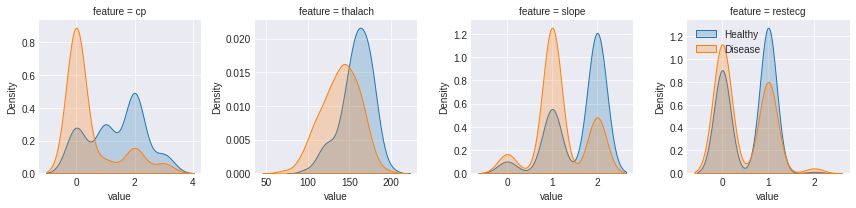

In [63]:
# plot SNS
long_df = pd.melt(data_copy_LR, data_copy_LR.columns[-1], data_copy_LR.columns[:-1], var_name="feature")

g = sns.FacetGrid(long_df, col="feature", hue="target", 
                sharex=False, sharey=False, col_wrap=5, )
                # palette="flare")
g.map(sns.kdeplot, "value", shade=True)
plt.legend(labels=["Healthy", "Disease"], loc="upper left")
plt.show()

In [64]:
# Split the dataset into train/test datasets.
targets = data_copy_LR.pop("target")  # remove the target label from the dataframe

# create the test:train split
x_train, x_test, y_train, y_test = train_test_split(
    data_copy_LR, targets, test_size=0.25, random_state=42
)

# Normalize the continuous features, ignore discrete (here treat age as continuous)
features_to_standardize = ["cp", "thalach", "slope", "restecg"]

column_transformer = ColumnTransformer(
    [("scaler", StandardScaler(), features_to_standardize)], remainder="passthrough"
)
x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)

In [65]:
# Create and train the model
model = LogisticRegression(n_input_features=x_train.shape[-1])

costs, accuracies, weights, bias = model.train(x_train, y_train,
                    epochs=5000,
                    learning_rate=0.01,
                    minibatch_size=None,
                    verbose=True)

# Predict the test labels
predictions = model.predict(x_test)
accuracy = model.accuracy(predictions, y_test)
print(f"Model test prediction accuracy: {accuracy:0.2f}%")

Final model cost: 0.51              
Model test prediction accuracy: 75.00%


In [66]:
print(confusion_matrix(y_test,predictions.round()))
print(classification_report(y_test, predictions.round()))

[[30 11]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.71      0.77      0.74        35

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



# KNN

In [67]:
data_copy_KNN = data_copy.copy()

In [68]:
#standardization the dataset by removing the mean and scaling to unit varience
standardScaler = StandardScaler()
scale_columns = ['cp', 'thalach', 'slope', 'restecg']
data_copy_KNN[scale_columns] = standardScaler.fit_transform(data_copy_KNN[scale_columns]) #secara otomatis mengikuti library scikit learn
data_copy_KNN

,cp,thalach,slope,restecg,target
0,1.973123,0.015443,-2.274579,-1.005832,1
1,1.002577,1.633471,-2.274579,0.898962,1
2,0.032031,0.977514,0.976352,-1.005832,1
3,0.032031,1.239897,0.976352,0.898962,1
4,-0.938515,0.583939,0.976352,0.898962,1
...,...,...,...,...,...
298,-0.938515,-1.165281,-0.649113,0.898962,0
299,1.973123,-0.771706,-0.649113,0.898962,0
300,-0.938515,-0.378132,-0.649113,0.898962,0
301,-0.938515,-1.515125,-0.649113,0.898962,0


In [69]:
#SPLIT DATA
Y = data_copy_KNN['target']
X = data_copy_KNN.drop(['target'], axis = 1)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.33, random_state = 0) #diambil 1/3 data

In [70]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1) #SET K=1

In [71]:
knn.fit(x_training,y_training)

KNeighborsClassifier(n_neighbors=1)

In [72]:
prediction = knn.predict(x_testing)
prediction

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

Text(95.18, 0.5, 'predicted class')

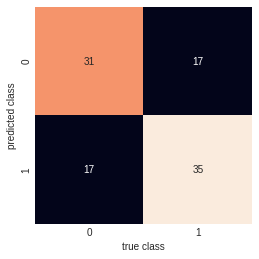

In [73]:
conmat=confusion_matrix(y_testing,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')

In [74]:
print(classification_report(y_testing,prediction))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        48
           1       0.67      0.67      0.67        52

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [75]:
#OPTIMALIZATION OF K VALUE

accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data_copy_KNN['target'],cv=10) #10 fold. ini cross validation. 70 rb dibagi jd 10 fold = 7 ribu data per fold
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

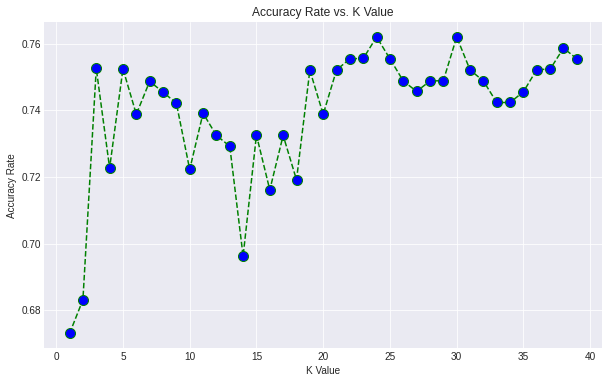

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

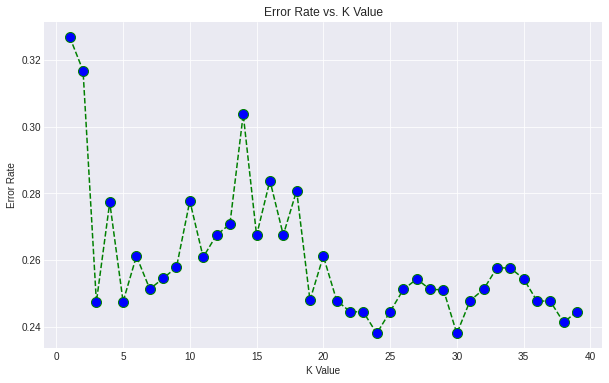

In [77]:
#ERROR SCORE OF EACH K VALUE
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data_copy_KNN['target'],cv=10)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [78]:
#Untuk K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

WITH K=4


[[39  9]
 [18 34]]


              precision    recall  f1-score   support

           0       0.68      0.81      0.74        48
           1       0.79      0.65      0.72        52

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



Accuracy score given for test data: 73.0


In [79]:
#Untuk K=26
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('K=26')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

K=26


[[37 11]
 [ 7 45]]


              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.80      0.87      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



Accuracy score given for test data: 82.0


# Hypothesis Testing

In [80]:
data_copy_HT = data_copy.copy()

In [81]:
data_copy_HT

,cp,thalach,slope,restecg,target
0,3,150,0,0,1
1,2,187,0,1,1
2,1,172,2,0,1
3,1,178,2,1,1
4,0,163,2,1,1
...,...,...,...,...,...
298,0,123,1,1,0
299,3,132,1,1,0
300,0,141,1,1,0
301,0,115,1,1,0


In [82]:
data_norm = data_copy_HT[data_copy_HT['target'] == 0]
data_abnorm = data_copy_HT[data_copy_HT['target'] == 1]

norm_training_data = data_norm.iloc[0:int(0.75*len(data_norm))] #ambil array 0 sampai 75% nya
abnorm_training_data = data_abnorm.iloc[0:int(0.75*len(data_abnorm))]

norm_cv_data = data_norm.iloc[int(0.75*len(data_norm)):]
abnorm_cv_data = data_abnorm.iloc[int(0.75*len(data_abnorm)):]

training_data = pd.concat([norm_training_data,abnorm_training_data]) #sum of training data from class 0 and 1
cv_data = pd.concat([norm_cv_data,abnorm_cv_data])

In [83]:
training_data

,cp,thalach,slope,restecg,target
165,0,108,1,0,0
166,0,129,1,0,0
167,0,160,0,0,0
168,0,147,1,0,0
169,0,155,0,0,0
...,...,...,...,...,...
118,1,172,2,1,1
119,0,152,1,0,1
120,0,122,1,1,1
121,0,182,2,0,1


In [84]:
cv_data

,cp,thalach,slope,restecg,target
268,0,116,1,0,0
269,0,103,0,0,0
270,0,144,2,0,0
271,3,145,1,1,0
272,0,71,1,1,0
...,...,...,...,...,...
160,1,169,0,1,1
161,1,166,2,1,1
162,1,182,2,1,1
163,2,173,2,1,1


In [85]:
data_columns = data_copy_HT.columns

In [86]:
data_columns

Index(['cp', 'thalach', 'slope', 'restecg', 'target'], dtype='object')

In [87]:
training_data_fitur = training_data.copy()
training_data_fitur.drop(labels=data_columns[4],axis=1,inplace=True)

In [88]:
data_fitur_columns = training_data_fitur.columns
data_fitur_columns

Index(['cp', 'thalach', 'slope', 'restecg'], dtype='object')

In [89]:
training_data_melt = training_data.melt(id_vars='target')

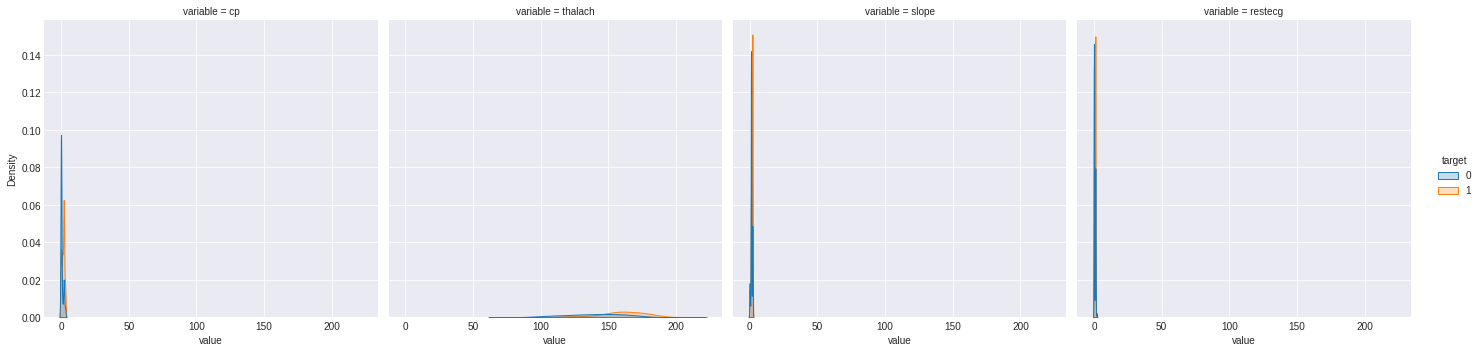

In [90]:
sns.displot(
    data=training_data_melt, 
    x='value', 
    hue='target', 
    kind='kde', 
    fill=True,
    col='variable'
)

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(10,50))

normalized_training_data = scaler.fit_transform(training_data_fitur)

print(normalized_training_data)

[[10.         17.01754386 30.         10.        ]
 [10.         24.38596491 30.         10.        ]
 [10.         35.26315789 10.         10.        ]
 [10.         30.70175439 30.         10.        ]
 [10.         33.50877193 10.         10.        ]
 [36.66666667 28.94736842 30.         10.        ]
 [23.33333333 38.07017544 10.         30.        ]
 [23.33333333 35.26315789 30.         10.        ]
 [36.66666667 39.8245614  50.         10.        ]
 [10.         25.43859649 30.         10.        ]
 [10.         19.12280702 30.         10.        ]
 [10.         35.26315789 50.         30.        ]
 [36.66666667 34.56140351 50.         30.        ]
 [10.         21.22807018 30.         10.        ]
 [10.         18.42105263 30.         10.        ]
 [10.         25.43859649 30.         30.        ]
 [10.         19.12280702 30.         10.        ]
 [10.         38.42105263 50.         10.        ]
 [36.66666667 37.01754386 30.         10.        ]
 [10.         24.03508772 30.  

In [92]:
normalized_df_training_data_features = pd.DataFrame(normalized_training_data, columns=data_fitur_columns)

print(normalized_df_training_data_features)

            cp    thalach  slope  restecg
0    10.000000  17.017544   30.0     10.0
1    10.000000  24.385965   30.0     10.0
2    10.000000  35.263158   10.0     10.0
3    10.000000  30.701754   30.0     10.0
4    10.000000  33.508772   10.0     10.0
..         ...        ...    ...      ...
221  23.333333  39.473684   50.0     30.0
222  10.000000  32.456140   30.0     10.0
223  10.000000  21.929825   30.0     30.0
224  10.000000  42.982456   50.0     10.0
225  36.666667  39.473684   50.0     10.0

[226 rows x 4 columns]


In [93]:
normalized_df_training_data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       226 non-null    float64
 1   thalach  226 non-null    float64
 2   slope    226 non-null    float64
 3   restecg  226 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


In [94]:
normalized_df_training_data_features['target'] = target

In [95]:
normalized_df_training_data_features_melt = normalized_df_training_data_features.melt(id_vars='target')

In [96]:
normalized_df_training_data_features_melt

,target,variable,value
0,1,cp,10.0
1,1,cp,10.0
2,1,cp,10.0
3,1,cp,10.0
4,1,cp,10.0
...,...,...,...
899,0,restecg,30.0
900,0,restecg,10.0
901,0,restecg,30.0
902,0,restecg,10.0


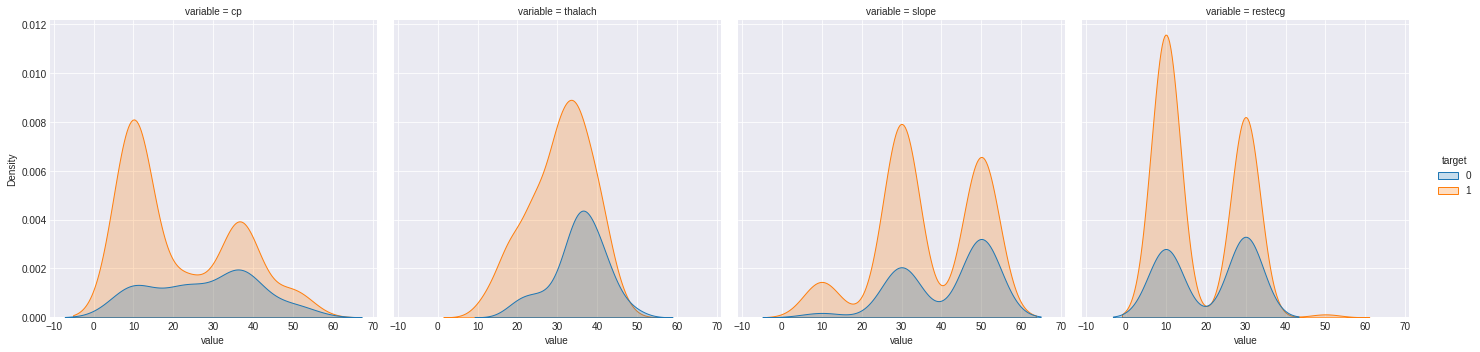

In [97]:
sns.displot(
    data=normalized_df_training_data_features_melt, 
    x='value', 
    hue='target', 
    kind='kde', 
    fill=True,
    col='variable'
)

In [98]:
def plot_feature_distplot(data,feature):
    
    data_mean_normal = 0
    data_mean_abnormal = 0
    data_std_normal = 0
    data_std_abnormal = 0

    data_mean_abnormal = np.mean(data[data['target'] == 1][feature])
    data_std_abnormal = np.std(data[data['target'] == 1][feature])
    data_mean_normal = np.mean(data[data['target'] == 0][feature])
    data_std_normal = np.std(data[data['target'] == 0][feature])

    pdf_abnormal = s.multivariate_normal.pdf(data[data['target'] == 1][feature],data_mean_abnormal,data_std_abnormal)
    pdf_normal = s.multivariate_normal.pdf(data[data['target'] == 0][feature],data_mean_normal,data_std_normal)

    sns.distplot(pdf_abnormal, hist=False, label='1')
    sns.distplot(pdf_normal, hist=False,  label='0')
    plt.xlabel(feature)
    plt.ylabel("probability")

    plt.legend()
    plt.show()

    return pdf_normal, pdf_abnormal

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


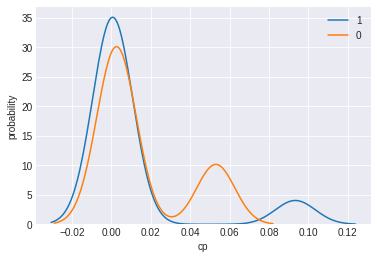

In [99]:
pdf_cp_0, pdf_cp_1 = plot_feature_distplot(normalized_df_training_data_features,'cp')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


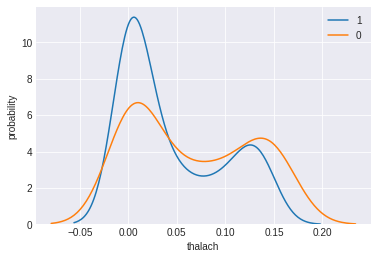

In [100]:
pdf_thal_0, pdf_thal_1 = plot_feature_distplot(normalized_df_training_data_features,'thalach')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


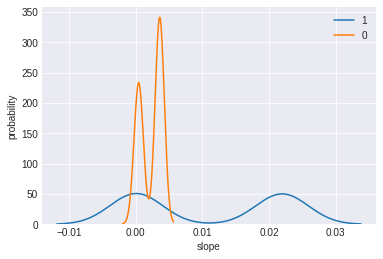

In [101]:
pdf_slope_0, pdf_slope_1 = plot_feature_distplot(normalized_df_training_data_features,'slope')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


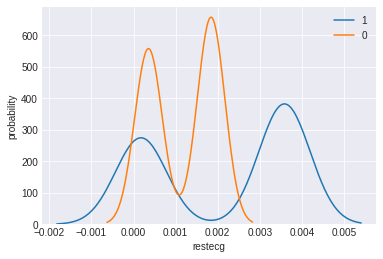

In [102]:
pdf_restecg_0, pdf_restecg_1 = plot_feature_distplot(normalized_df_training_data_features,'restecg')

In [103]:
mean_cp_normal = np.mean(training_data[training_data['target'] == 0]['cp'])
mean_thalach_normal = np.mean(training_data[training_data['target'] == 0]['thalach'])
mean_slope_normal = np.mean(training_data[training_data['target'] == 0]['slope'])
mean_restecg_normal = np.mean(training_data[training_data['target'] == 0]['restecg'])
std_cp_normal = np.std(training_data[training_data['target'] == 0]['cp'])
std_thalach_normal = np.std(training_data[training_data['target'] == 0]['thalach'])
std_slope_normal = np.std(training_data[training_data['target'] == 0]['slope'])
std_restecg_normal = np.std(training_data[training_data['target'] == 0]['restecg'])

In [104]:
mean_cp_abnorm = np.mean(training_data[training_data['target'] == 1]['cp'])
mean_thalach_abnorm = np.mean(training_data[training_data['target'] == 1]['thalach'])
mean_slope_abnorm = np.mean(training_data[training_data['target'] == 1]['slope'])
mean_restecg_abnorm = np.mean(training_data[training_data['target'] == 1]['restecg'])
std_cp_abnorm = np.std(training_data[training_data['target'] == 1]['cp'])
std_thalach_abnorm = np.std(training_data[training_data['target'] == 1]['thalach'])
std_slope_abnorm = np.std(training_data[training_data['target'] == 1]['slope'])
std_restecg_abnorm = np.std(training_data[training_data['target'] == 1]['restecg'])

In [105]:
import math

In [106]:
#alpha beta
def alpha_beta(threshold, sigma_1, mean_0, sigma_0, mean_1):
    
    total_alpha = 0
    total_beta = 0

    for i in range(threshold, 101):
        alpha_value = ((1/(math.sqrt(2*3.14)*sigma_1))*math.exp((-(i-mean_1)**2)/2*(sigma_1**2)))
        total_alpha = total_alpha + alpha_value

    for i in range(1, threshold+1):
        beta_value = ((1/(math.sqrt(2*3.14)*sigma_0))*math.exp((-(i-mean_0)**2)/2*(sigma_0**2)))
        total_beta = total_beta + beta_value    
        
    return total_alpha, total_beta

In [107]:
#setting double threshold

def set_threshold(total_alpha, total_beta):
    t1 = (1-total_beta)/total_alpha
    t2 = total_beta/(1-total_alpha)

    return t1, t2

In [108]:
#probability ratio each feature
def likelihood(pdf_0, pdf_1):
    likelihood = pdf_0/pdf_1

    return likelihood

In [109]:
def hypothesis_testing (likelihood, t1, t2):
    H1 = likelihood >= t1
    H0 = likelihood <= t2
    need_moredata = np.bitwise_and(likelihood > t2, likelihood < t1)
    return H1, H0, need_moredata 

In [110]:
from collections import Counter

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


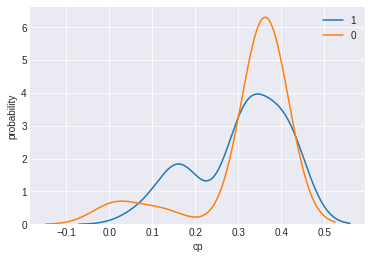

In [111]:
#feat 2 : cp
alpha_cp, beta_cp = alpha_beta(5, std_cp_abnorm, mean_cp_normal, std_cp_normal, mean_cp_abnorm)
t1_cp, t2_cp = set_threshold(alpha_cp, beta_cp)
pdf_cp_0, pdf_cp_1 = plot_feature_distplot(cv_data, 'cp')
pdf_cp_1 = pdf_cp_1[7:] #remove first 7 elements
likelihood_cp = likelihood(pdf_cp_0, pdf_cp_1)

In [112]:
H1_cp, H0_cp, need_moredata_cp = hypothesis_testing(likelihood_cp, t1_cp, t2_cp)

In [113]:
H1_cp

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [114]:
Counter(H1_cp)

Counter({False: 35})

In [115]:
Counter(H0_cp)

Counter({False: 31, True: 4})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


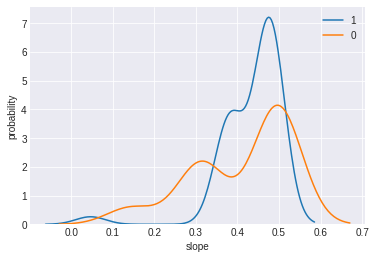

In [116]:
#feat 3 : slope
alpha_slope, beta_slope = alpha_beta(5, std_slope_abnorm, mean_slope_normal, std_slope_normal, mean_slope_abnorm)
t1_slope, t2_slope = set_threshold(alpha_slope, beta_slope)
pdf_slope_0, pdf_slope_1 = plot_feature_distplot(cv_data, 'slope')
pdf_slope_1 = pdf_slope_1[7:] #remove first 7 elements
likelihood_slope = likelihood(pdf_slope_0, pdf_slope_1)

In [117]:
H1_slope, H0_slope, need_moredata_slope = hypothesis_testing(likelihood_slope, t1_slope, t2_slope)

In [118]:
H1_slope

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [119]:
Counter(H1_slope)

Counter({True: 35})

In [120]:
Counter(H0_slope)

Counter({True: 34, False: 1})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


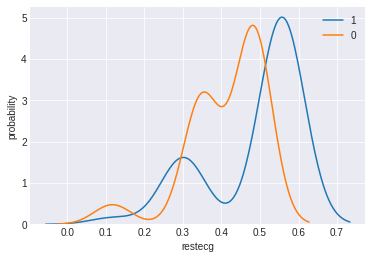

In [121]:
#feat 4 : restecg
alpha_restecg, beta_restecg = alpha_beta(5, std_restecg_abnorm, mean_restecg_normal, std_restecg_normal, mean_restecg_abnorm)
t1_restecg, t2_restecg = set_threshold(alpha_restecg, beta_restecg)
pdf_restecg_0, pdf_restecg_1 = plot_feature_distplot(cv_data, 'restecg')
pdf_restecg_1 = pdf_restecg_1[7:] #remove first 7 elements
likelihood_restecg = likelihood(pdf_restecg_0, pdf_restecg_1)

In [122]:
H1_restecg, H0_restecg, need_moredata_restecg = hypothesis_testing(likelihood_restecg, t1_restecg, t2_restecg)

In [123]:
Counter(H1_slope)

Counter({True: 35})

In [124]:
Counter(H0_slope)

Counter({True: 34, False: 1})

<ipython-input-107-9587c6cbe56b>:4: RuntimeWarning: divide by zero encountered in double_scalars
  t1 = (1-total_beta)/total_alpha
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


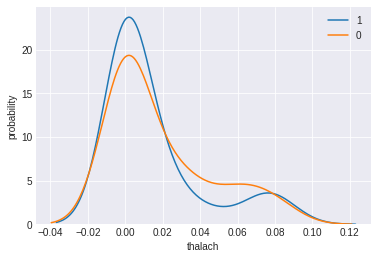

In [125]:
#feat 1 : thalach
alpha_thalach, beta_thalach = alpha_beta(10, std_thalach_abnorm, mean_thalach_normal, std_thalach_normal, mean_thalach_abnorm)
t1_thalach, t2_thalach = set_threshold(alpha_thalach, beta_thalach)
pdf_thalach_0, pdf_thalach_1 = plot_feature_distplot(cv_data, 'thalach')
pdf_thalach_1 = pdf_thalach_1[7:] #remove first 7 elements
likelihood_thalach = likelihood(pdf_thalach_0, pdf_thalach_1)

In [126]:
H1_thalach, H0_thalach, need_moredata_thalach = hypothesis_testing(likelihood_thalach, t1_thalach, t2_thalach)

In [127]:
Counter(H1_thalach)

Counter({False: 35})

In [128]:
Counter(H0_thalach)

Counter({False: 35})